<a href="https://colab.research.google.com/github/4deepprk/4deepprk.github.io/blob/master/DL_104_Generic_FFNN_(binary_and_multi_class_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# Generic Feed Forward Neural Network (binary classification)

In [0]:
class GFFNN:

  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs # #input features
    self.ny = 1 # only one neuron as output for binary classification task
    self.nh = len(hidden_sizes) # #hidden layers
    self.sizes = [self.nx] + hidden_sizes + [self.ny] # list

    self.W = {}
    self.B = {}
    for i in range(self.nh + 1):
      self.W[i + 1] = np.random.randn(self.sizes[i], self.sizes[i + 1])
      self.B[i + 1] = np.zeros((1, self.sizes[i + 1]))
    
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh + 1):
      self.A[i + 1] = np.matmul(self.H[i], self.W[i + 1]) + self.B[i + 1]
      self.H[i + 1] = self.sigmoid(self.A[i + 1])
    return self.H[self.nh + 1]
  
  def grad_sigmoid(self, x):
    return x*(1 - x)

  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0,- 1):
      self.dW[k] = np.matmul(self.H[k - 1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k - 1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=False, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [0]:
# 1 output neuron
# color map to visualize the target variable
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", 
                                                                   "yellow", 
                                                                   "green",
                                                                   "blue"])

# Generate data (binary classification)

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, 
                          random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


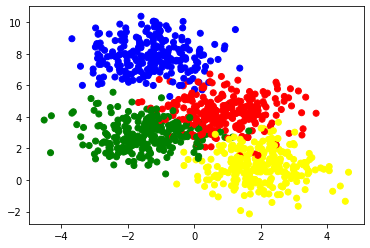

In [5]:
# x1, x2, y(4 labels) -> 3 dimensional
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_original = labels
# for binary classification purpose 2 labels are made out of 4 labels
labels = np.mod(labels_original, 2)

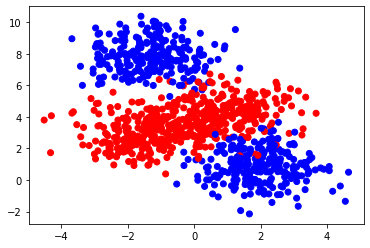

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
# Now true label is of 2 classes with blue and red where true decision boundary 
# is not linear
plt.show() # true decision boundary (non-linear)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels,
                                                  random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# FFNN - Binary classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


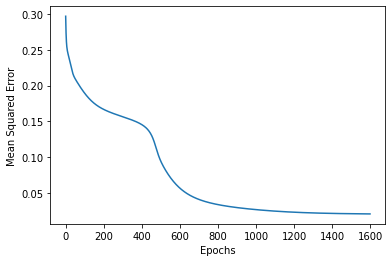

In [9]:
# model instantiation
# 2 input features and 2 hidden layers 
# where hidden layer 1 has 2 neurons and hidden layer 2 has 3 neurons
bffnn = GFFNN(2, [4, 7])
# training the model
bffnn.fit(X_train, Y_train, epochs = 1600, learning_rate = 0.22, 
       display_loss = True)

In [10]:
# model prediction

# forward pass prediction
Y_pred_train = bffnn.predict(X_train)
# binarise for accuracy purpose
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

# forward pass prediction
Y_pred_val = bffnn.predict(X_val)
# binarise for accuracy purpose
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.94


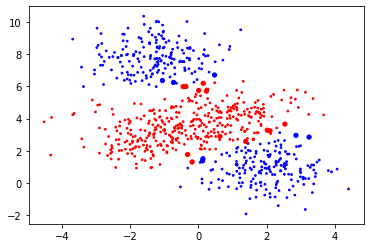

' What can we see here is, it is still not clear whether it is by increasing\nthe layers in the network or the neurons in the layer (but a consistent trail and\nerror method of doing hyper-parameter tuning would better result in good \naccuracy) '

In [11]:
# Visualizing how the model is predicting the classes correctly and incoorectly
# 4 dimensions: x1, x2, predicted class, predicted class correct and incorrect
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap,
            s=15*(np.abs(Y_pred_binarised_train - Y_train) + 0.2))

# large reds and blues are incorrect classification
# small reds and blues are correct classification
plt.show()
''' What can we see here is, it is still not clear whether it is by increasing
the layers in the network or the neurons in the layer (but a consistent trail and
error method of doing hyper-parameter tuning would better result in good 
accuracy) '''

# Generic Feed Forward Neural Network (multi-class classification)

In [0]:
class GFFNNMUL:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

# Generate data (multi-class classification)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_original, 
                                                  stratify=labels_original, 
                                                  random_state=0)

print(X_train.shape, X_val.shape, labels_original.shape)

(750, 2) (250, 2) (1000,)


In [14]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


# FFNN - Multi-class classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


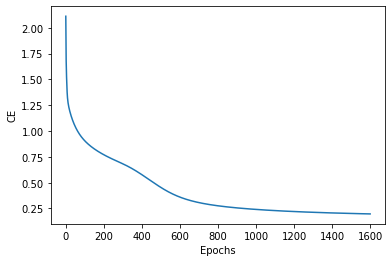

In [15]:
ffnnmul = GFFNNMUL(2,4,[4,7])
ffnnmul.fit(X_train,y_OH_train,epochs=1600,learning_rate=.22,display_loss=True)

In [16]:
Y_pred_train = ffnnmul.predict(X_train)
# print("old", type(Y_pred_train), Y_pred_train.shape, Y_pred_train.ndim, Y_pred_train.size)
Y_pred_train = np.argmax(Y_pred_train,1)
# print("new", type(Y_pred_train), Y_pred_train.shape, Y_pred_train.ndim, Y_pred_train.size)

Y_pred_val = ffnnmul.predict(X_val)
# print("old", type(Y_pred_val), Y_pred_val.shape, Y_pred_val.ndim, Y_pred_val.size)
Y_pred_val = np.argmax(Y_pred_val,1)
# print("new", type(Y_pred_val), Y_pred_val.shape, Y_pred_val.ndim, Y_pred_val.size)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.92
Validation accuracy 0.95


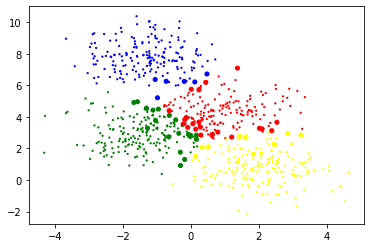

' An intuition that can be vaguely made upto this point of my learning of simple\nFFNN is that it is better to increase the # neurons first and then try to increase\nthe layer in the network. But again this is not rule of thumb. A final verdict \nwould be that hyper-parameter tuning is essential to obtain better result for the\nbetter performance of the model. '

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()
''' An intuition that can be vaguely made upto this point of my learning of simple
FFNN is that it is better to increase the # neurons first and then try to increase
the layer in the network. But again this is not rule of thumb. A final verdict 
would be that hyper-parameter tuning is essential to obtain better result for the
better performance of the model. '''

# Exercises - play with non-linear datasets

In [0]:
from sklearn.datasets import make_moons, make_circles

In [19]:
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.15)
print(data.shape, labels.shape)

(1000, 2) (1000,)


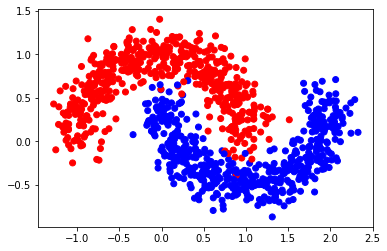

In [20]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [21]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


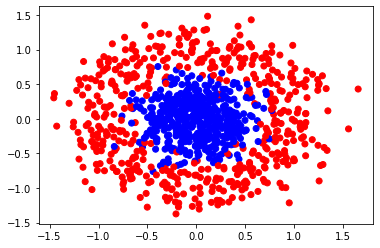

In [22]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()